<h2> We are performing the Welch's test based on the temperature category. We want to see if the temperature on a particular day affects the number of bikes rented on that day </h2> 

In [1]:
import statsmodels.api as sm 
from scipy import stats
import researchpy as py 

from sklearn.preprocessing import scale 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

%matplotlib inline 

In [2]:
df_bike = pd.read_csv('python/hypothesis testing/02/demos/datasets/bike_sharing_data_processed.csv')

In [3]:
df_bike.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


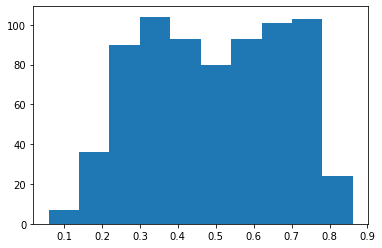

In [5]:
plt.hist(df_bike['temp']);

In [6]:
df_bike['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

 <H3> Since the values of temperature is numerical, we can somehow derive a category out of it <h3>

In [8]:
sample_01 = df_bike.query('temp >= 0.5')
sample_02 = df_bike.query('temp < 0.5')

In [9]:
#check the sizes of each dataframe
sample_01.shape, sample_02.shape

((365, 7), (366, 7))

In [10]:
sample_01.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
48,1,2,0,1,1,0.521667,2927
76,1,3,0,1,1,0.540000,3239
93,2,4,0,1,1,0.573333,3115
100,2,4,0,1,2,0.595652,3348
101,2,4,0,1,2,0.502500,2034


In [11]:
#check out their means 
sample_01['cnt'].describe()

count     365.00000
mean     5610.89863
std      1478.58408
min      1115.00000
25%      4548.00000
50%      5336.00000
75%      6904.00000
max      8714.00000
Name: cnt, dtype: float64

In [12]:
sample_02['cnt'].describe()

count     366.000000
mean     3400.822404
std      1696.996100
min        22.000000
25%      1971.000000
50%      3316.000000
75%      4557.000000
max      8090.000000
Name: cnt, dtype: float64

<H3> Based on the above, the amount of bikes rented when the temperature is below 0.5 is greater than when the temperature is above 0.5 </h3>

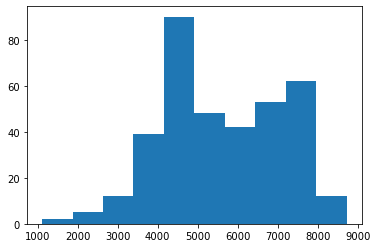

In [14]:
#we can visualize the distribution of bikes rented 
plt.hist(sample_01['cnt']);

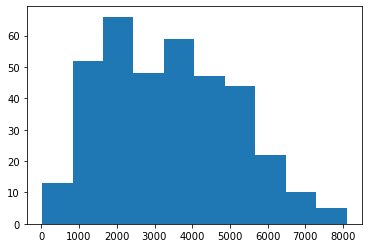

In [16]:
plt.hist(sample_02['cnt']);

<h3> Make sure that they are of the same shape </h3>

In [19]:
sample_01.shape, sample_02.shape

((365, 7), (366, 7))

In [20]:
sample_2 = sample_02.sample(365)

<h3> Perform the test for variance </h3>

In [21]:
stats.levene(sample_01['cnt'], sample_2['cnt'])

LeveneResult(statistic=5.0501414345575855, pvalue=0.02492265652747153)

<h3> From the above, the variance are not equal according to levene test and so we will use the welch's t-test </h3>

<h3> test for normality </h3>

In [24]:
#first we find the residue 

residue = scale(np.array(sample_01['cnt']) - np.array(sample_2['cnt']))

<h4> rough test using a histogram plot </h4>

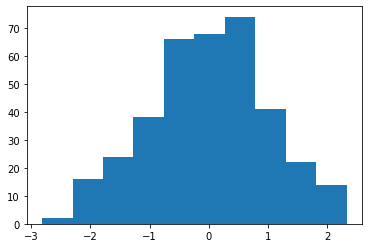

In [26]:
plt.hist(residue);

In [28]:
#perform the test using shapiro
stats.shapiro(residue)

(0.9936569333076477, 0.12990567088127136)

<h3> from the above, it can be concluded that the distribution is normally distributed </h3>

<h4> We can further apply a Q-Q plot </h4>

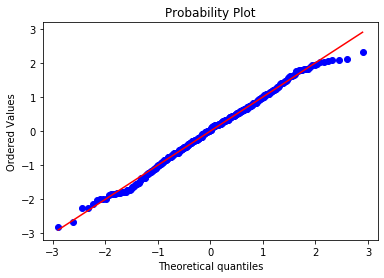

In [29]:
stats.probplot(residue, plot= plt, dist= 'norm');
plt.show()

<h3> From the Q-Q plot above it is normally distributed </h3>

In [31]:
description, result = py.ttest(sample_01['cnt'], sample_2['cnt'], group1_name= 'high temp', group2_name= 'low temp', equal_variances= False)

In [32]:
description 

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,high temp,365.0,5610.898630,1478.584080,77.392628,5458.705829,5763.091432
1,low temp,365.0,3403.109589,1698.760550,88.917191,3228.253704,3577.965474
2,combined,730.0,4507.004110,1937.208069,71.699287,4366.242388,4647.765832


In [33]:
result

,Welch's t-test,results
0,Difference (high temp - low temp) =,2207.7890
1,Degrees of freedom =,714.4088
2,t =,18.7290
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.3864
7,Hedge's g =,1.3850
8,Glass's delta =,1.4932
9,r =,0.5739


<h3> Based on the p-value of 0.00 above, we can conclude that the difference in temperate are statistically significant. 